In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras.preprocessing import image
from keras.preprocessing.image import save_img
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import save_img
%matplotlib inline

from mpl_toolkits.axes_grid1 import ImageGrid
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
!mkdir test

In [ ]:
new_model=tf.keras.models.load_model('pixalate_scale_23_.h5')

# Check its architecture
new_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
!cp /content/drive/MyDrive/image_restoration/pixalate_scale_23_.h5 ./

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def pixalate_image(image, scale_percent = 85):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)

  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  
  # scale back to original size
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)

  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)

  low_res_image = cv2.resize(low_res_image, (256, 256)) 

  return low_res_image

In [ ]:
face_images = glob.glob('test/*.jpg')

In [ ]:
all_images = []

for i in tqdm(face_images):
  img = image.load_img(i, target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255.
  img = pixalate_image(img)
  all_images.append(img)

100%|██████████| 3/3 [00:00<00:00, 296.05it/s]


In [ ]:
all_images = np.array(all_images)
predictions = new_model.predict(all_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


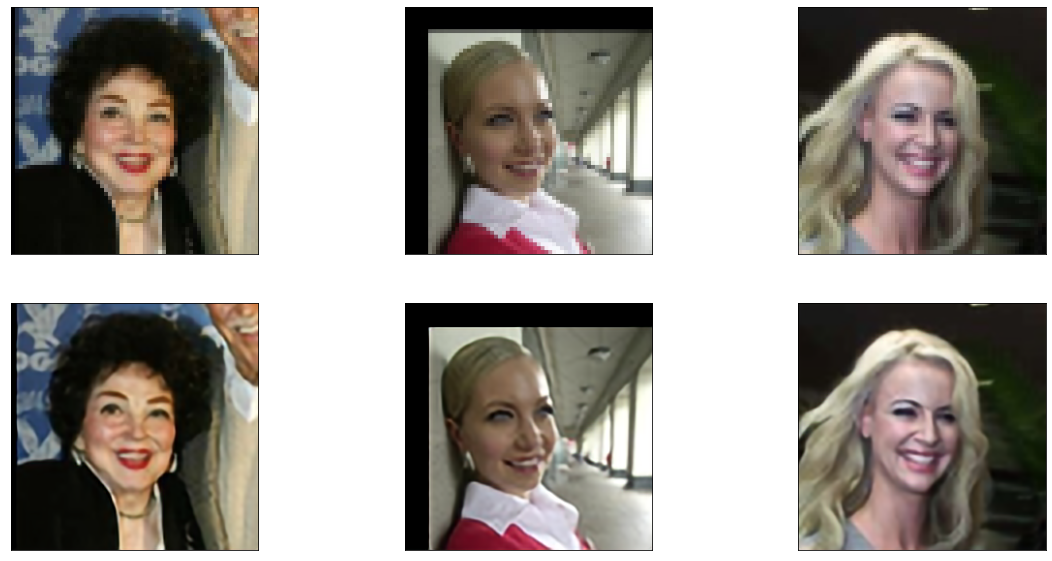

In [ ]:
n =3
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(all_images[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[n])
  #save_img(f'{i}.jpg', predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)